# Métricas de Classificação_res

In [1]:
import numpy as np
from sklearn import metrics
from sklearn import linear_model
import matplotlib.pyplot as plt
import math

In [3]:
arq = open('c:\\dados\\mimimi_raro.csv', 'r')
texto = arq.readlines()
arq.close()


lx1=[]
lx2=[]

X=[]
ly=[]

for l in texto:
   l1=l.split(";")
   lx1.append(float(l1[0]))
   lx2.append(float(l1[1]))
   ly.append(float(l1[2]))
   

   

X = list(zip(lx1,lx2))


X=np.array(X)

Y = ly
Y=np.array(Y)







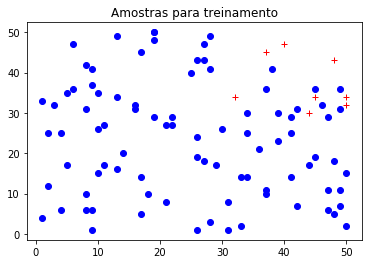

In [4]:
#Gráfico com as amostras para treinamento

for i in range(len(X)):
    if(Y[i]==1.0):plt.plot(lx1[i],lx2[i],'r+')
    else:plt.plot(lx1[i],lx2[i],'bo')
plt.title('Amostras para treinamento')    
plt.show()

In [13]:
#É criado o objeto de classificação

logreg = linear_model.LogisticRegression()

#aprendizado
model=logreg.fit(X, Y)


#predição
Z=logreg.predict(X)

print(logreg.coef_)
print(logreg.intercept_)

scr=[]
for i in range(len(Y)):
    scr.append(1.0/(1+math.exp(-(logreg.intercept_[0]+logreg.coef_[0,0]*lx1[i]+logreg.coef_[0,1]*lx2[i]))))

thresholds=[0.10,0.16,0.20,0.50]



[[0.02345765 0.0146597 ]]
[-3.09625523]


threshold= 0.1
accuracy = 0.5154639175257731
8 0
47 42
Prec= 0.14545454545454545
Recall= 1.0
F1-Score= 0.25396825396825395


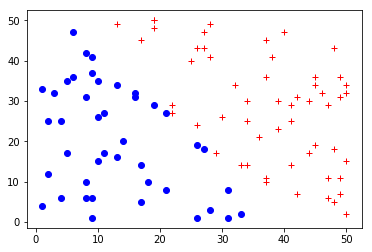

threshold= 0.16
accuracy = 0.9175257731958762
7 1
7 82
Prec= 0.5
Recall= 0.875
F1-Score= 0.6363636363636364


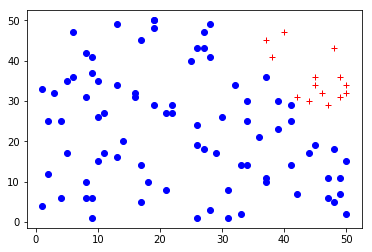

threshold= 0.2
accuracy = 0.9278350515463918
1 7
0 89
Prec= 1.0
Recall= 0.125
F1-Score= 0.2222222222222222


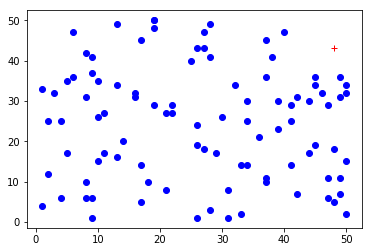

threshold= 0.5
accuracy = 0.9175257731958762
0 8
0 89
Prec= -1
Recall= 0.0


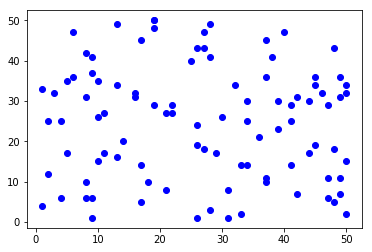

In [30]:
for t in [0.10,0.16,0.20,0.50]:
    print('threshold=',t)
    ye=[]
    certos=0
    TP,FP,TN,FN=0,0,0,0
    for i in range(len(Y)):
        if scr[i]>t:ye.append(1)
        else: ye.append(0)
        if int(ye[i])==int(Y[i]):certos+=1
        if int(Y[i])==1 and int(ye[i])==0:FN+=1
        if int(Y[i])==1 and int(ye[i])==1:TP+=1
        if int(Y[i])==0 and int(ye[i])==0:TN+=1
        if int(Y[i])==0 and int(ye[i])==1:FP+=1
    print('accuracy =',certos/len(Y))
    print(TP,FN)
    print(FP,TN)
    if TP+FP > 0.0:Precision=TP/(TP+FP)
    else: Precision=-1
    if TP+FN > 0.0:Recall=TP/(TP+FN)  
    else: Recall=-1
    print('Prec=',Precision)
    print('Recall=',Recall)
    if Precision !=-1 and Recall!=-1:
        print('F1-Score=',2*Precision*Recall/(Precision+Recall))
        
    for k in range(len(X)):
        if(ye[k]==1):plt.plot(lx1[k],lx2[k],'r+')
        else:plt.plot(lx1[k],lx2[k],'bo')
    plt.show()

In [20]:
metrics.accuracy_score(ye,Y)

0.9175257731958762